<a href="https://colab.research.google.com/github/giakomorssi/Machine_Learning/blob/main/03_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Data

In [86]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Change Colab runtime to GPU
import os
os.environ['COLAB_TPU_ADDR'] = ''
os.environ['COLAB_GPU_ALLOC'] = '1'
os.environ['COLAB_GPU'] = '1'
print("Runtime switched to GPU")

import tensorflow as tf

# This code sets the runtime to use the GPU if available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Runtime switched to GPU
Please install GPU version of TF


In [87]:
df = pd.read_csv('/content/drive/MyDrive/University/ML/customer_segmentation_RFM.csv')

In [88]:
df_rfm = df[['monetary', 'frequency', 'recency']]

# Scale the Data

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

monetary = scaler.fit_transform(df[['monetary']])
frequency = scaler.fit_transform(df[['frequency']])
recency = scaler.fit_transform(df[['recency']])

monetary = pd.DataFrame(monetary) 
frequency = pd.DataFrame(frequency)
recency = pd.DataFrame(recency)

In [90]:
X = pd.concat([monetary, frequency, recency], axis=1)
X.columns = ['monetary', 'frequency', 'recency']

# KMeans Clustering


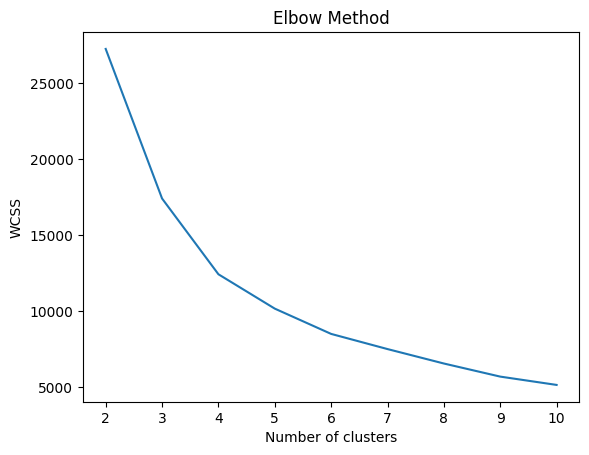

In [91]:
# Cluster the data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import pyplot as plt
import numpy as np

# Calculate within-cluster sum of squares for different values of k
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    labels = kmeans.predict(X)

# Plot the elbow graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Find the optimal value for k and fit the model.

In [92]:
!pip -q install kneed
from kneed import KneeLocator

# Find optimal k using elbow method
elbow = KneeLocator(range(2,11), wcss, curve='convex', direction='decreasing')
optimal_k = elbow.elbow + 1
print("Optimal k value:", optimal_k)

Optimal k value: 5


In [93]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=500, n_init=10)

X['Cluster'] = kmeans.fit_predict(X)
df_rfm['Cluster'] = X['Cluster']

print('Number of order per cluster')
print(df_rfm['Cluster'].value_counts())

Number of order per cluster
4    6309
0    6226
2     983
3     161
1      39
Name: Cluster, dtype: int64


<ipython-input-93-2ce3e3c7c80b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Visualization

### 3D Plot

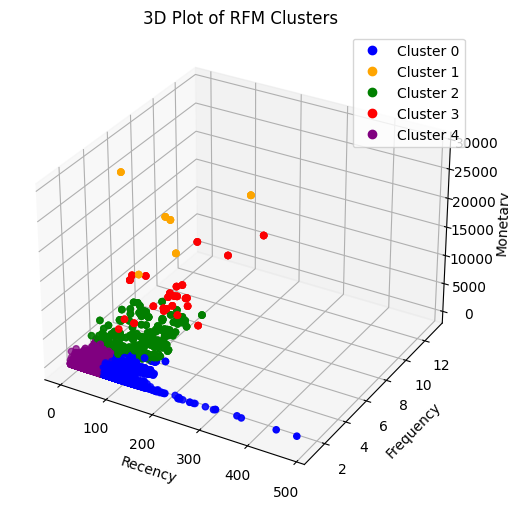

In [94]:
from mpl_toolkits import mplot3d
import matplotlib.colors as mcolors
import matplotlib.cm as cm

colors = ['blue', 'orange', 'green', 'red', 'purple']
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# Create a ScalarMappable object for the colormap
sm = cm.ScalarMappable(cmap=cmap)
sm.set_array([])

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

# Add data to the plot
x = df_rfm['recency']
y = df_rfm['frequency']
z = df_rfm['monetary']
c = df_rfm['Cluster']

ax.scatter3D(x, y, z, c=c, cmap=cmap)

# Add labels to the plot
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Move the y-axis label to the left
ax.yaxis.set_ticks_position('both')

# Add a legend to the plot
for i in range(len(colors)):
    ax.plot([], [], 'o', color=colors[i], label=f'Cluster {i}')
    
ax.legend()

plt.title('3D Plot of RFM Clusters')
plt.show()

### 2D Plots

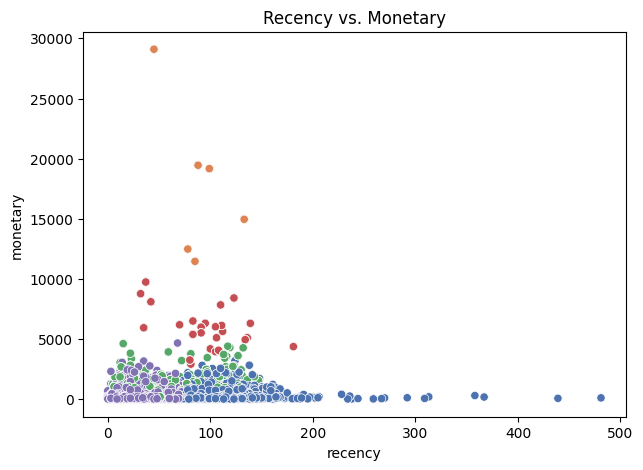

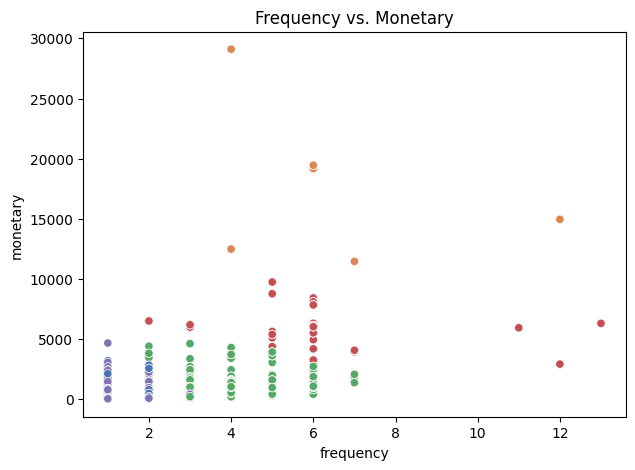

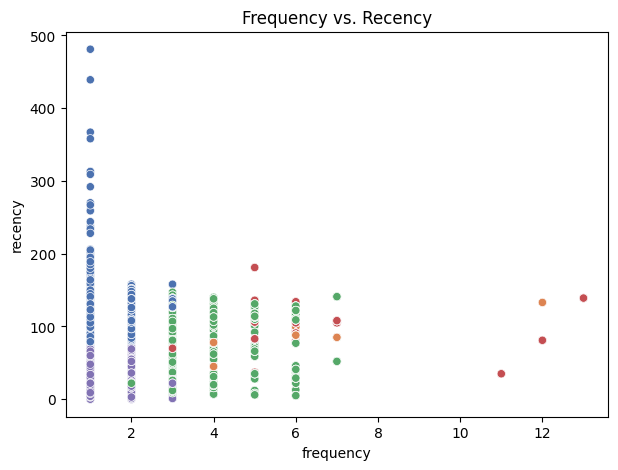

In [95]:
import seaborn as sns

# Visualize the clusters
fig, ax = plt.subplots(figsize=(7, 5))
# Create a scatter plot of the data, with points colored by cluster label
sns.scatterplot(data=df_rfm, x=df_rfm['recency'], y=df_rfm['monetary'], hue=df_rfm['Cluster'], palette='deep', legend=None)
plt.title('Recency vs. Monetary') # Set the title of the plot
plt.show() # Show the plot

print('\n')

# Visualize the clusters
fig, ax = plt.subplots(figsize=(7, 5))
# Create a scatter plot of the data, with points colored by cluster label
sns.scatterplot(data=df_rfm, x=df_rfm['frequency'], y=df_rfm['monetary'], hue=df_rfm['Cluster'], palette='deep', legend=None)
plt.title('Frequency vs. Monetary') # Set the title of the plot
plt.show() # Show the plot

print('\n')

# Visualize the clusters
fig, ax = plt.subplots(figsize=(7, 5))
# Create a scatter plot of the data, with points colored by cluster label
sns.scatterplot(data=df_rfm, x=df_rfm['frequency'], y=df_rfm['recency'], hue=df_rfm['Cluster'], palette='deep', legend=None)
plt.title('Frequency vs. Recency') # Set the title of the plot
plt.show() # Show the plot

## Most Important Features

In [96]:
import pandas as pd
import plotly.express as px
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler

# initialize the scaler
scaler = MinMaxScaler()

# scale the data
df_rfm_scaled = pd.DataFrame(scaler.fit_transform(df_rfm[['monetary', 'frequency', 'recency']]),
                             columns=['monetary', 'frequency', 'recency'])
df_rfm_scaled['Cluster'] = df_rfm['Cluster']

# define the colors for the clusters
colors = ['blue', 'orange', 'green', 'red', 'purple']
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# define the range for the radar plots
range_r = [0, 1]

# iterate over the unique cluster values in the dataframe
for cluster in df_rfm_scaled['Cluster'].unique():
    # filter the dataframe to only include data points in the current cluster
    cluster_df = df_rfm_scaled[df_rfm_scaled['Cluster'] == cluster][['monetary', 'frequency', 'recency']].mean()

    # create a list of column names
    categories = list(cluster_df.index)

    # create the figure
    fig = px.line_polar(cluster_df, r=cluster_df.values, theta=categories, line_close=True,
                        color_discrete_sequence=[px.colors.qualitative.Plotly[cluster]])

    # update the colors of the radar plot to match the 3D plot
    fig.update_traces(line_color=colors[cluster])

    # update the range for the radar plot
    fig.update_layout(polar=dict(radialaxis=dict(range=range_r)), title=f'Cluster {cluster} Analysis of RFM Data', showlegend=False)

    # show the plot
    fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



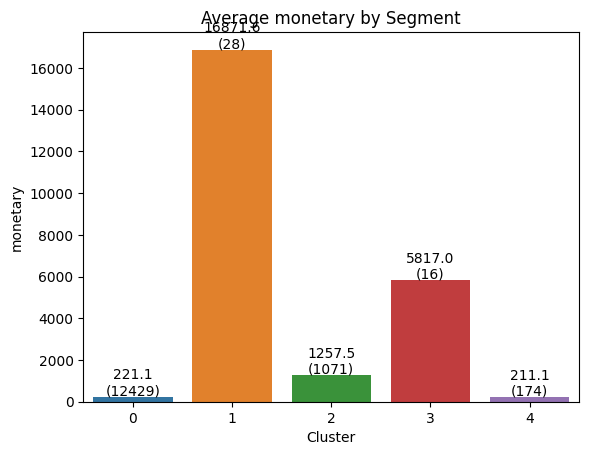

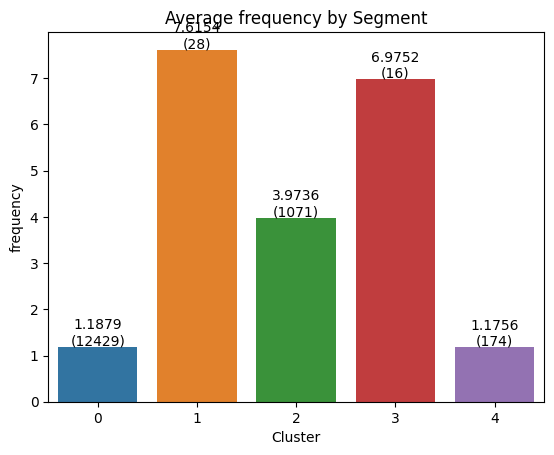

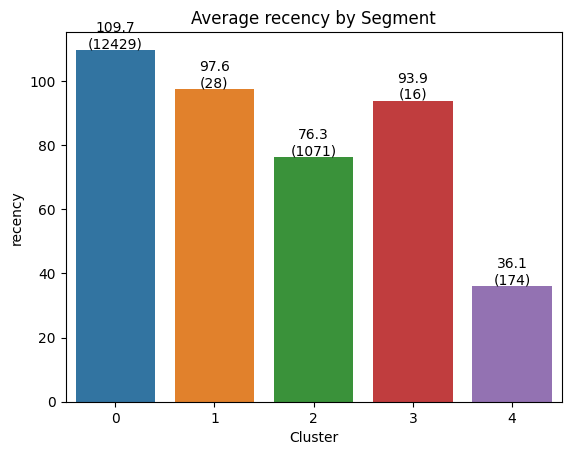

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# define the counts
counts = [12429, 28, 1071, 16, 174]

# plot for monetary
ax = sns.barplot(data=df_rfm, x='Cluster', y='monetary', errorbar=None)
plt.title('Average monetary by Segment')

# add count and value on top of bars
for i, p in enumerate(ax.patches):
    ax.annotate(f"{p.get_height():.1f}\n({counts[i]})",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

print('\n')

# plot for frequency
ax = sns.barplot(data=df_rfm, x='Cluster', y='frequency', errorbar=None)
plt.title('Average frequency by Segment')

# add count and value on top of bars
for i, p in enumerate(ax.patches):
    ax.annotate(f"{p.get_height():.4f}\n({counts[i]})",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

print('\n')

# plot for recency
ax = sns.barplot(data=df_rfm, x='Cluster', y='recency', errorbar=None)
plt.title('Average recency by Segment')

# add count and value on top of bars
for i, p in enumerate(ax.patches):
    ax.annotate(f"{p.get_height():.1f}\n({counts[i]})",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [98]:
# Print average values for the 5 segments
print(df_rfm['Cluster'].value_counts())
print(df_rfm.groupby('Cluster').mean())

4    6309
0    6226
2     983
3     161
1      39
Name: Cluster, dtype: int64
             monetary  frequency     recency
Cluster                                     
0          221.116659   1.187922  109.734822
1        16871.614103   7.615385   97.564103
2         1257.462696   3.973550   76.329603
3         5817.043975   6.975155   93.900621
4          211.119504   1.175622   36.071327


### Comments

* **Cluster 0: Blue**

  This cluster has a very low `monetary value`, a `low frequency` and the `highest recency value (longer time since last purchase)`. It has an `high amount of observations`.

  I would identify this as the `worst customers`.

* **Cluster 1: Orange** 

  This cluster has the `lowest monetary value`, the `lowest frequency`, but has the lowest `recency value (shorter time since last purchase)`. It has the `highest amount of observations`.

  I would identify this as the `most recent customer with low spending anmd frequency`.

* **Cluster 2: Green**

  This is the cluster with the `highest monetary value` and the `2nd highest frequency`. It has the `2nd highest recency value`. It has the `lowest amount of observations (39)`.

  I would identify this as the `best customers`.

* **Cluster 3: Red**

  This cluster has the `2nd highest monetary value`. It has the `2nd highest frequency` and it has an `high recency`, close to cluster 2. It has `few observations (179)`.

  I would identify this as the `2nd best customers`.

* **Cluster 4: Purple**

  This cluster has a `medium low monetary` value, a `medium frequency` value and it has a `medium recency`. It has `a medium amount of observations`.
  
  I would identify this as the `medium customers`.
